# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_csv(r'C:\Users\Ardra\Desktop\DS\Assign\Regression\car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Plots to describe the data

<function matplotlib.pyplot.show(close=None, block=None)>

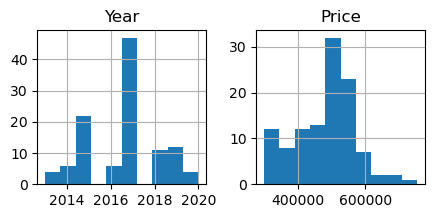

In [7]:
freqgraph = data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(5,2))
plt.show

<AxesSubplot:title={'center':'Correlation between Year and Price'}>

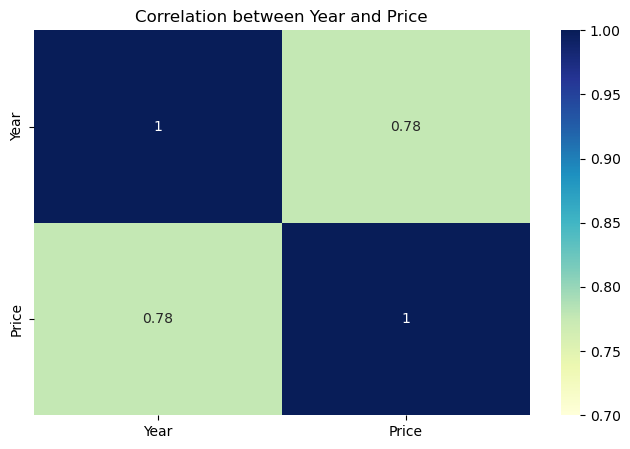

In [8]:
corrmatrix = data.corr()
plt.subplots(figsize=(8,5))
plt.title("Correlation between Year and Price")
sns.heatmap(corrmatrix,annot=True,vmin=.7,vmax=1,cmap='YlGnBu')

<function matplotlib.pyplot.show(close=None, block=None)>

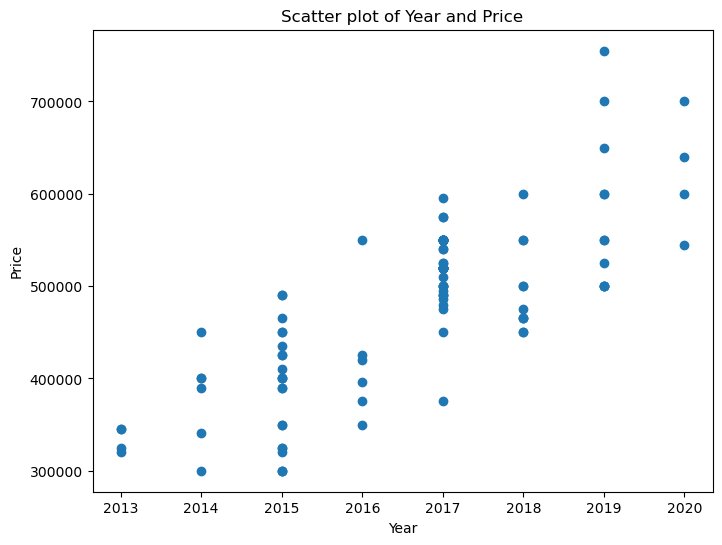

In [9]:
plt.subplots(figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(data.Year, data.Price)
plt.title("Scatter plot of Year and Price")
plt.show

# Linear regression: Model fitting

In [10]:
y = data['Price']
x = data.drop(['Price'],axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y,train_size=0.25,random_state=0)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (28, 1)
x_test: (84, 1)
y_train: (28,)
y_test: (84,)


In [12]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

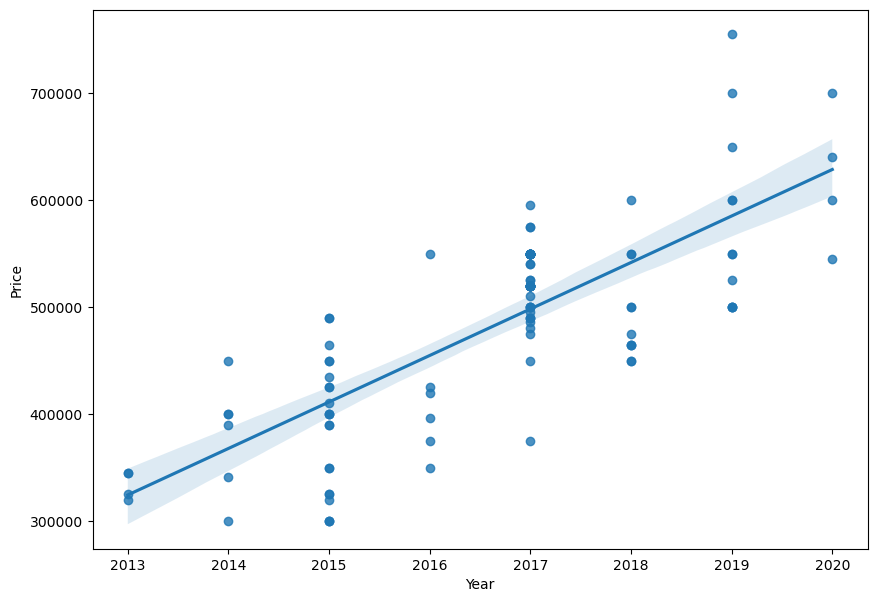

In [13]:
plt.subplots(figsize=(10,7))
sns.regplot('Year','Price', data=data)
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print('r2 score = ',r2_score(y_test,y_pred))

r2 score =  0.5659275439797313


## Linear regression: Prediction of the year 2022

In [15]:
model.fit(x.values,y)
prediction_2022 = lr.predict([[2022]])
print(f"Possible price of a 2022 model second-hand grand i10:{prediction_2022}")

Possible price of a 2022 model second-hand grand i10:[715488.07850976]


# Lasso Regression fitting

In [16]:
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)

In [17]:
x_train,x_test, y_train, y_test = train_test_split(x, y,train_size=0.25,random_state=42)
from sklearn.linear_model import Lasso
lasso_model = Lasso().fit(x_train,y_train)
alpha =100
model = Lasso(alpha=1.0)
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train) 
lasso.coef_
y_pred_lasso = lasso_model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r2score_lasso = r2_score(y_test,y_pred_lasso)
print('r2 score_lasso = ',r2_score(y_test,y_pred_lasso))

r2 score_lasso =  0.46166695537650926


## Lasso regression: Prediction of the year 2022

In [19]:
X = x.values
model.fit(X,y)
prediction_2022_lasso = lasso.predict([[2022]])
print(f"Possible price of a 2022 model second-hand grand i10:{prediction_2022_lasso}")

Possible price of a 2022 model second-hand grand i10:[789797.25738396]


# Result:

In [20]:
from simple_colors import *
print(red('Linear Regression', ['bold', 'underlined']))
print(f"R-squared score of Linear Regression Model is {r2score}")
print(blue(f"Possible price of a 2022 model second-hand grand i10: {prediction_2022}",['bold']))
print("=========================================================================")
print(red('Lasso Regression', ['bold', 'underlined']))
print(f"R-squared score of Linear Regression Model is {r2score_lasso}")
print(blue(f"Possible price of a 2022 model second-hand grand i10: {prediction_2022_lasso}",['bold']))

Linear Regression
R-squared score of Linear Regression Model is 0.5659275439797313
Possible price of a 2022 model second-hand grand i10: [715488.07850976]
Lasso Regression
R-squared score of Linear Regression Model is 0.46166695537650926
Possible price of a 2022 model second-hand grand i10: [789797.25738396]
